# David Gamaliel Arcos Bravo
# Luis Fernando Caro Reyna

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Best fitness: 0.0
Best individual: [4. 6. 1. 3. 7. 0. 2. 5.]


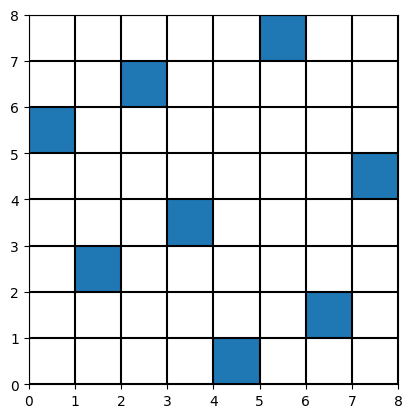

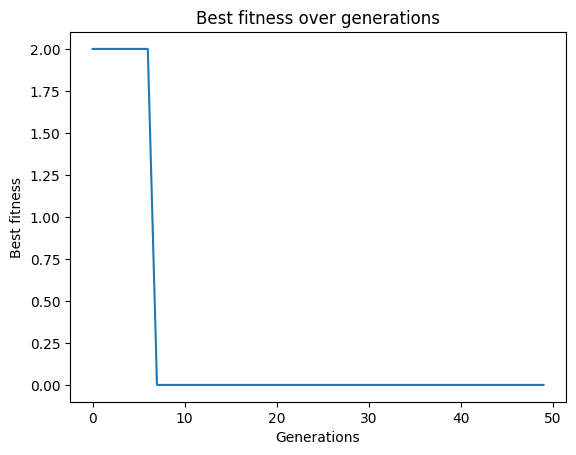

In [123]:
# Genetic algorithm function to solve the N queens problem
def genetic_algorithm(N, population_size, generations, mutation_rate):
    # Initialize population
    population = np.array([np.random.permutation(N) for i in range(population_size)])
    # Initialize fitness
    fitness = np.zeros(population_size)
    # Initialize best fitness
    best_fitness = np.zeros(generations)
    # Initialize best individual
    best_individual = np.zeros((generations, N))
    # Initialize best fitness
    best_fitness[0] = fitness_function(population[0])
    # Initialize best individual
    best_individual[0] = population[0]
    # Initialize fitness
    for i in range(population_size):
        fitness[i] = fitness_function(population[i])
        if fitness[i] < best_fitness[0]:
            best_fitness[0] = fitness[i]
            best_individual[0] = population[i]
    # Loop through generations
    for i in range(1, generations):
        # Initialize new population
        new_population = np.zeros_like(population)
        # Initialize new fitness
        new_fitness = np.zeros(population_size)
        best_fitness[i] = best_fitness[i - 1]
        best_individual[i] = best_individual[i - 1]
        # Loop through population
        for j in range(population_size):
            # Select parents
            parent1 = select_parent(population, fitness)
            parent2 = select_parent(population, fitness)
            # Crossover parents
            child = crossover(parent1, parent2)
            # Mutate child
            child = mutate(child, mutation_rate)
            # Add child to new population
            new_population[j] = child
            # Calculate fitness
            new_fitness[j] = fitness_function(child)
            # Check if child is the best solution
            if new_fitness[j] < best_fitness[i - 1]:
                best_fitness[i] = new_fitness[j]
                best_individual[i] = child
        # Replace population
        population = new_population
        fitness = new_fitness
    # Return best fitness and best individual
    return best_fitness, best_individual

# Crossover function
def crossover(parent1, parent2):
    n = parent1.size
    children = np.zeros(n, dtype=np.int32)
    i, j = np.random.randint(2,n-1,size=2)
    if i > j: i, j = j, i
    children[i:j] = parent1[i:j].copy()
    visit = np.zeros(n)
    visit[children[i:j]] = 1
    valid = np.zeros(n)
    valid[:i] = valid[j:] = 1
    idx = i
    for k, val in enumerate(valid):
        if val == False: continue
        if not visit[parent2[k]]:
            children[k] = parent2[k]
        else:
            while visit[parent2[idx]]: idx += 1
            children[k] = parent2[idx]
            idx += 1
    return children

# Mutate function
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            swap_with = int(np.random.rand() * len(individual))
            individual[i], individual[swap_with] = individual[swap_with], individual[i]
    return individual

# Fitness function
def fitness_function(individual):
    fitness = 0
    for i in range(len(individual)):
        for j in range(len(individual)):
            if i == j:
                continue
            if individual[i] == individual[j]:
                fitness += 1
            offset = j - i
            if individual[i] == individual[j] - offset or individual[i] == individual[j] + offset:
                fitness += 1
    return fitness

# Select parent function
def select_parent(population, fitness):
    parent = np.zeros(len(population[0]))
    parent_fitness = fitness_function(parent)
    for i in range(len(population)):
        if fitness[i] < parent_fitness:
            parent_fitness = fitness[i]
            parent = population[i]
    return parent

def plot_solution(solution, N) -> None:
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, N))
    ax.set_ylim((0, N))
    # Draw grid
    for i in range(N + 1):
        ax.plot([0, N], [i, i], 'k')
        ax.plot([i, i], [0, N], 'k')
    # Draw queens
    count = 0
    for queen in solution:
        ax.add_patch(patches.Rectangle((queen, count), 1, 1))
        count += 1
    # fig.savefig(''.join([str(a) for a in solution]) + '.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Main function
def main():
    # Initialize N
    N = 8
    # Initialize population size
    population_size = 20
    # Initialize generations
    generations = 50
    # Initialize mutation rate
    mutation_rate = 0.1
    # Run genetic algorithm
    best_fitness, best_individual = genetic_algorithm(N, population_size, generations, mutation_rate)
    # Print best fitness
    print('Best fitness: ' + str(best_fitness[-1]))
    # Print best individual
    print('Best individual: ' + str(best_individual[-1]))
    # Plot best fitness
    plot_solution(best_individual[-1], N)
    plt.plot(best_fitness)
    plt.xlabel('Generations')
    plt.ylabel('Best fitness')
    plt.title('Best fitness over generations')
    plt.show()

if __name__ == '__main__':
    main()